## 1090 North Logan | Comparing Model | Selling Price Analysis

In [24]:
# Library Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="ticks")

In [25]:
# Ingest Data:
df = pd.read_excel(r'C:\Data Sciences\data\all_data\data.xlsx')

In [26]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,24.0,340141.666667,12834.419303,320000.00000,328925.000000,344500.000000,350000.000000,364900.000000
sqft,24.0,2089.500000,306.532784,1496.00000,1876.000000,2092.000000,2292.250000,2782.000000
price/sqft,24.0,166.238235,25.873841,129.88189,148.451136,158.132646,180.179049,223.930481
bedrms,24.0,3.500000,0.510754,3.00000,3.000000,3.500000,4.000000,4.000000
full_bath(s),24.0,2.208333,0.414851,2.00000,2.000000,2.000000,2.000000,3.000000
half_baths(s),24.0,0.750000,0.442326,0.00000,0.750000,1.000000,1.000000,1.000000
yr_built,24.0,1992.625000,6.212277,1986.00000,1988.000000,1989.500000,1996.000000,2008.000000
lot_size,24.0,9157.791667,2061.457673,6401.00000,7618.500000,8474.000000,10229.250000,13245.000000


In [27]:
df.head()

,price,sqft,price/sqft,bedrms,full_bath(s),half_baths(s),yr_built,lot_size,floor_plan,bsmnt_type
0,326000,1855,175.741240,3,2,1,1987,10569,split,finished
1,329900,2540,129.881890,4,2,1,1986,9836,split,finished
2,335000,1496,223.930481,3,2,1,2008,10634,2 story,unfinished
3,349000,2011,173.545500,4,2,0,1989,6406,split,finished
4,349950,1915,182.741514,3,2,1,1992,11462,split,finished


In [ ]:
# Apply built type to categorize older vs. newer:
def built_grouping(a):
    if a['yr_built'] >= 2000:
        return 'newer'

    else:
        return 'older'

df['built_type'] = df.apply(built_grouping, axis =1)

# Apply sq type to categorize over or under 2,000sq/ft:
def sqft_grouping(b):
    if b['sqft'] >= 1999.999999999999:
        return 'over'

    else:
        return 'under'

df['sqft_over_2000'] = df.apply(sqft_grouping, axis =1)

# Group lot size that is over 10000:
def lot_size_grouping(c):
    if c['lot_size'] >= 9999.999999999999:
        return 'over'

    else:
        return 'under'

df['lot_size_over_10000'] = df.apply(lot_size_grouping, axis =1)

# Nana type grouping:
def similar_house(d):
    if ((d['floor_plan'] == 'split') and (d['bsmnt_type'] == 'unfinished') and (d['sqft_over_2000'] == 'under')):
        return 'Nana Type'

    else:
        return 'Other'

df['same_type'] = df.apply(similar_house, axis =1)

In [35]:
df.corr()

,price,sqft,price/sqft,bedrms,full_bath(s),half_baths(s),yr_built,lot_size
price,1.000000,0.081542,0.192893,-0.013597,0.147326,-0.206018,0.410061,0.065344
sqft,0.081542,1.000000,-0.949006,0.437663,0.313012,-0.268397,-0.068827,0.229360
price/sqft,0.192893,-0.949006,1.000000,-0.465240,-0.303148,0.256558,0.231341,-0.143195
bedrms,-0.013597,0.437663,-0.465240,1.000000,0.307794,-0.384900,-0.089068,-0.045898
full_bath(s),0.147326,0.313012,-0.303148,0.307794,1.000000,-0.888523,0.132856,-0.035586
half_baths(s),-0.206018,-0.268397,0.256558,-0.384900,-0.888523,1.000000,-0.067246,0.164587
yr_built,0.410061,-0.068827,0.231341,-0.089068,0.132856,-0.067246,1.000000,0.360732
lot_size,0.065344,0.229360,-0.143195,-0.045898,-0.035586,0.164587,0.360732,1.000000


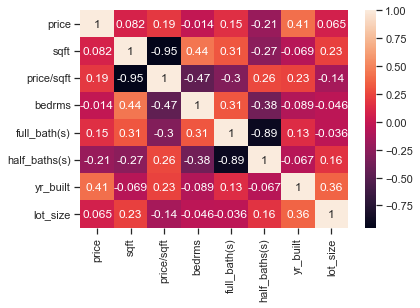

In [37]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()